In [1]:

import pandas as pd
import pandas as pd
import datetime
from  window_generator  import WindowGenerator
import pandas as pd
import tensorflow as tf
from binance_data import get_binance_data
from data_processing import train_test   , compile_and_fit , normalize , data_parser  , data_for_prediction_parser
import pandas as pd
from transformer import create_transformer 

In [2]:
### Configuration of the prediction
label_width = 6
imput_width=label_width*7
#variables_used = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume','num_trades','taker_base_vol','taker_quote_vol' ]
#variables_used = df.columns
variables_used = ['close']
input_shape = (imput_width, len(variables_used))



In [99]:

start_time = "1 Jun 2018"
# Get current date and time
now = datetime.datetime.now()
# Format date and time as a string
end_time = now.strftime("%Y-%m-%d %H:%M:%S")

data = get_binance_data ('BTCUSDT',  start_time, end_time )
training_df = data_parser(data)
training_df_norm = normalize(training_df,imput_width=imput_width ,window=30)


In [100]:
training_df_norm

,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_vol,taker_quote_vol
open_time,,,,,,,,,,
2018-06-03 23:00:00,4.590350,4.133718,4.586088,4.499111,-0.489525,6.417969,-0.407600,-0.831107,-0.375739,-0.280581
2018-06-04 00:00:00,4.513836,4.068668,4.830715,3.833773,1.466096,6.417969,1.608293,0.247215,2.096819,2.255699
2018-06-04 01:00:00,3.820303,2.956720,3.426644,3.230899,-0.406446,6.417969,-0.329605,2.025150,-0.766987,-0.692707
2018-06-04 02:00:00,3.234165,2.390919,2.984263,2.428799,-0.611265,6.417969,-0.545831,2.625042,-0.754362,-0.687235
2018-06-04 03:00:00,2.485365,2.124784,2.723712,2.383100,-1.073583,6.417969,-1.016285,-1.427570,-0.911236,-0.846167
...,...,...,...,...,...,...,...,...,...,...
2023-04-08 19:00:00,-1.299456,-1.596587,-0.813647,-1.128966,-0.820199,6.417969,-0.827696,-0.428983,-0.740131,-0.746963
2023-04-08 20:00:00,-1.128935,-1.647245,-0.433979,-1.265612,-1.116076,6.417969,-1.122578,-0.681390,-1.139548,-1.145107
2023-04-08 21:00:00,-1.265459,-1.918588,-0.520767,-1.066610,-1.281248,6.417969,-1.287740,-0.637457,-1.238344,-1.243639


2023-04-08 23:39:38.438586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-08 23:39:38.439660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-08 23:39:38.440603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

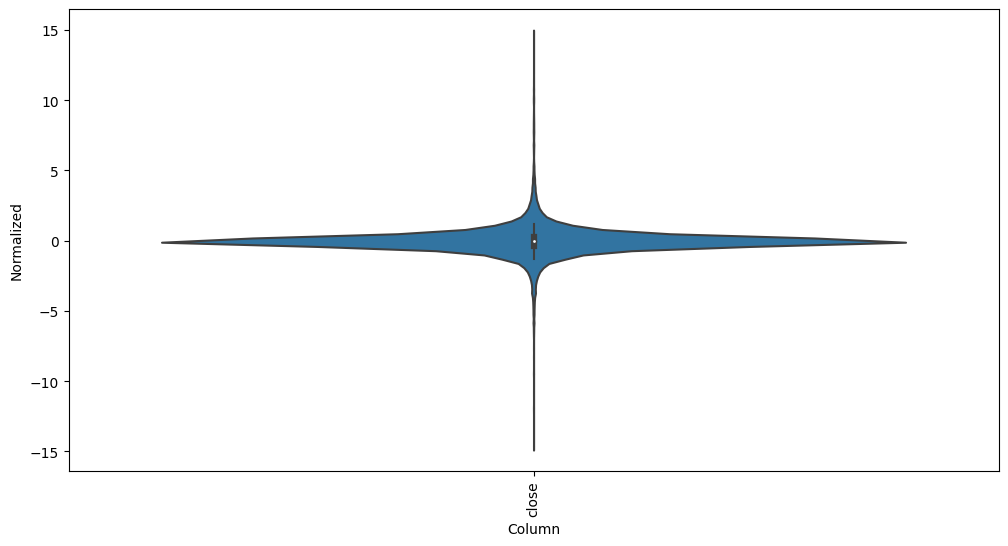

In [101]:
train_df, val_df, test_df = train_test(training_df_norm[variables_used])

wide_window = WindowGenerator(
        input_width=imput_width, label_width=label_width, shift=0,
        label_columns=["close"] , train_df=train_df, val_df=val_df, test_df=test_df )

Dense = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=input_shape),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(label_width)
] , name='Dense')

LSTM =  tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=input_shape ),

    tf.keras.layers.Dense(label_width)
] , name='LSTM')

LSTM2 =  tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=input_shape ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(label_width)
], name='LSTM2')

Conv1D = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(label_width)
] , name='Conv1D')

Transformer_model = create_transformer(input_shape, d_model=64,  dff=128)

In [3]:
models = [Dense,LSTM,LSTM2 , Conv1D]

NameError: name 'Dense' is not defined

In [103]:

val_performance={}
performance={}
for model in models:
        history = compile_and_fit(model, wide_window)

        val_performance[f"{model.name}"] = model.evaluate(wide_window.val)
        performance[f"{model.name}"] = model.evaluate(wide_window.test, verbose=0)


Epoch 1/40


2023-04-08 23:39:51.855116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [29675,1]
	 [[{{node Placeholder/_0}}]]
2023-04-08 23:39:51.855466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


922/927 [============================>.] - ETA: 0s - loss: 1.6242 - mean_absolute_error: 0.5549

2023-04-08 23:39:54.170715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-04-08 23:39:54.171061: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [8437]
	 [[{{node Placeholder/_8}}]]


927/927 [==============================] - 3s 2ms/step - loss: 1.6226 - mean_absolute_error: 0.5550 - val_loss: 0.8979 - val_mean_absolute_error: 0.6094
Epoch 2/40
927/927 [==============================] - 2s 2ms/step - loss: 0.3244 - mean_absolute_error: 0.2801 - val_loss: 0.1826 - val_mean_absolute_error: 0.2749
Epoch 3/40
927/927 [==============================] - 2s 2ms/step - loss: 0.2504 - mean_absolute_error: 0.2272 - val_loss: 0.0561 - val_mean_absolute_error: 0.1627
Epoch 4/40
927/927 [==============================] - 2s 2ms/step - loss: 0.0934 - mean_absolute_error: 0.1507 - val_loss: 0.2020 - val_mean_absolute_error: 0.2870
Epoch 5/40
927/927 [==============================] - 2s 2ms/step - loss: 0.1531 - mean_absolute_error: 0.1706 - val_loss: 0.0206 - val_mean_absolute_error: 0.0947
Epoch 6/40
927/927 [==============================] - 2s 2ms/step - loss: 0.0714 - mean_absolute_error: 0.1249 - val_loss: 0.0225 - val_mean_absolute_error: 0.0921
Epoch 7/40
927/927 [=======

2023-04-08 23:40:39.705374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-04-08 23:40:39.705733: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


264/264 [==============================] - 0s 1ms/step - loss: 0.0189 - mean_absolute_error: 0.0938


2023-04-08 23:40:40.128212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-04-08 23:40:40.128630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


Epoch 1/40


2023-04-08 23:40:40.361787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-04-08 23:40:40.362218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-04-08 23:40:40.512245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node grad

927/927 [==============================] - ETA: 0s - loss: 17.9027 - mean_absolute_error: 1.2210

2023-04-08 23:40:44.179824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [8437]
	 [[{{node Placeholder/_8}}]]
2023-04-08 23:40:44.180166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-04-08 23:40:44.326916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32


927/927 [==============================] - 4s 4ms/step - loss: 17.9027 - mean_absolute_error: 1.2210 - val_loss: 0.9743 - val_mean_absolute_error: 0.4864
Epoch 2/40
927/927 [==============================] - 3s 3ms/step - loss: 6.0179 - mean_absolute_error: 0.5912 - val_loss: 0.5948 - val_mean_absolute_error: 0.4014
Epoch 3/40
927/927 [==============================] - 3s 3ms/step - loss: 3.5260 - mean_absolute_error: 0.4818 - val_loss: 0.4086 - val_mean_absolute_error: 0.3498
Epoch 4/40
927/927 [==============================] - 3s 3ms/step - loss: 2.3770 - mean_absolute_error: 0.4170 - val_loss: 0.3757 - val_mean_absolute_error: 0.3190
Epoch 5/40
927/927 [==============================] - 3s 3ms/step - loss: 1.8234 - mean_absolute_error: 0.3832 - val_loss: 0.2960 - val_mean_absolute_error: 0.3095
Epoch 6/40
927/927 [==============================] - 3s 3ms/step - loss: 1.4902 - mean_absolute_error: 0.3611 - val_loss: 0.2382 - val_mean_absolute_error: 0.2668
Epoch 7/40
927/927 [======

2023-04-08 23:42:44.591178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [8437]
	 [[{{node Placeholder/_8}}]]
2023-04-08 23:42:44.591577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


264/264 [==============================] - 0s 2ms/step - loss: 0.0547 - mean_absolute_error: 0.1478


2023-04-08 23:42:45.105810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-04-08 23:42:45.106152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [4240,1]
	 [[{{node Placeholder/_0}}]]


Epoch 1/40


2023-04-08 23:42:45.395944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [29675,1]
	 [[{{node Placeholder/_0}}]]
2023-04-08 23:42:45.396340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [29634]
	 [[{{node Placeholder/_8}}]]
2023-04-08 23:42:45.545205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim

923/927 [============================>.] - ETA: 0s - loss: 8.0977 - mean_absolute_error: 1.5128

2023-04-08 23:42:50.816127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [8437]
	 [[{{node Placeholder/_8}}]]
2023-04-08 23:42:50.816467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-04-08 23:42:51.225846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32


927/927 [==============================] - 6s 5ms/step - loss: 8.0765 - mean_absolute_error: 1.5108 - val_loss: 0.8710 - val_mean_absolute_error: 0.5996
Epoch 2/40
927/927 [==============================] - 4s 4ms/step - loss: 4.3650 - mean_absolute_error: 1.1855 - val_loss: 0.9998 - val_mean_absolute_error: 0.6560
Epoch 3/40
927/927 [==============================] - 4s 4ms/step - loss: 3.8867 - mean_absolute_error: 1.1066 - val_loss: 0.8120 - val_mean_absolute_error: 0.5826
Epoch 4/40
927/927 [==============================] - 4s 4ms/step - loss: 3.6779 - mean_absolute_error: 1.0552 - val_loss: 1.1346 - val_mean_absolute_error: 0.6800
Epoch 5/40
927/927 [==============================] - 4s 4ms/step - loss: 3.7262 - mean_absolute_error: 1.0467 - val_loss: 0.8051 - val_mean_absolute_error: 0.6500
Epoch 6/40
927/927 [==============================] - 4s 4ms/step - loss: 3.4945 - mean_absolute_error: 1.0234 - val_loss: 1.4447 - val_mean_absolute_error: 0.8412
Epoch 7/40
927/927 [=======

2023-04-08 23:44:07.983728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-04-08 23:44:07.984154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


264/264 [==============================] - 0s 2ms/step - loss: 0.7315 - mean_absolute_error: 0.5985


2023-04-08 23:44:08.493199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [4199]
	 [[{{node Placeholder/_8}}]]
2023-04-08 23:44:08.493555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


Epoch 1/40


2023-04-08 23:44:08.788201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-04-08 23:44:08.788592: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [29675,1]
	 [[{{node Placeholder/_0}}]]


927/927 [==============================] - ETA: 0s - loss: 13.7528 - mean_absolute_error: 2.0182

2023-04-08 23:44:15.184088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-04-08 23:44:15.184518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


927/927 [==============================] - 7s 5ms/step - loss: 13.7528 - mean_absolute_error: 2.0182 - val_loss: 5.0778 - val_mean_absolute_error: 1.4686
Epoch 2/40
927/927 [==============================] - 4s 5ms/step - loss: 9.1830 - mean_absolute_error: 1.7001 - val_loss: 3.6391 - val_mean_absolute_error: 1.2346
Epoch 3/40
927/927 [==============================] - 4s 5ms/step - loss: 8.2852 - mean_absolute_error: 1.6035 - val_loss: 3.4110 - val_mean_absolute_error: 1.1305
Epoch 4/40
927/927 [==============================] - 4s 5ms/step - loss: 7.0987 - mean_absolute_error: 1.4836 - val_loss: 4.5508 - val_mean_absolute_error: 1.3572
Epoch 5/40
927/927 [==============================] - 4s 5ms/step - loss: 6.5700 - mean_absolute_error: 1.4194 - val_loss: 3.9027 - val_mean_absolute_error: 1.2052
Epoch 6/40
927/927 [==============================] - 4s 5ms/step - loss: 5.8844 - mean_absolute_error: 1.3436 - val_loss: 3.2590 - val_mean_absolute_error: 1.0592
Epoch 7/40
927/927 [======

2023-04-08 23:45:20.930217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-04-08 23:45:20.930649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


264/264 [==============================] - 0s 2ms/step - loss: 3.4825 - mean_absolute_error: 1.1242


2023-04-08 23:45:21.416237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-04-08 23:45:21.416586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [4199]
	 [[{{node Placeholder/_8}}]]


In [104]:
# performance and validated performance
pd.DataFrame(performance) , pd.DataFrame(val_performance)

(      Dense      LSTM     LSTM2    Conv1D
 0  0.025934  0.106516  0.947885  4.928379
 1  0.102092  0.163727  0.642667  1.255720,
       Dense      LSTM     LSTM2    Conv1D
 0  0.018918  0.054651  0.731542  3.482465
 1  0.093812  0.147781  0.598533  1.124214)

In [105]:
#save models
for model in models:
 model.save(f"{model.name}.h5" ,overwrite=True)

In [4]:
import glob
import tensorflow as tf
model_files = glob.glob("*.h5")
print(model_files)
loaded_models={}
for model_file in model_files:
    loaded_models[model_file.split(".h5")[0]] = tf.keras.models.load_model(model_file) 

['Dense.h5', 'LSTM2.h5', 'LSTM.h5', 'Conv1D.h5']


2023-04-09 00:00:31.520002: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-09 00:00:31.520150: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-09 00:00:31.566332: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:

data_pred = get_binance_data('BTCUSDT','1 feb 2023', '7 Apr 2023')
df_pred = data_parser(data_pred)
df_pred_norm = normalize(df_pred,imput_width=imput_width)
prediction_data = df_pred_norm.tail(imput_width)
data_for_prediction = data_for_prediction_parser(prediction_data , input_shape=input_shape)


1/1 [==============================] - 0s 50ms/step


open_time
2023-04-05 07:00:00    28525.21
2023-04-05 08:00:00    28543.80
2023-04-05 09:00:00    28508.76
2023-04-05 10:00:00    28510.00
2023-04-05 11:00:00    28554.38
2023-04-05 12:00:00    28568.95
2023-04-05 13:00:00    28404.58
2023-04-05 14:00:00    28105.20
2023-04-05 15:00:00    28031.09
2023-04-05 16:00:00    27947.99
2023-04-05 17:00:00    28023.74
2023-04-05 18:00:00    28030.20
2023-04-05 19:00:00    28240.64
2023-04-05 20:00:00    28150.61
2023-04-05 21:00:00    28181.06
2023-04-05 22:00:00    28175.28
2023-04-05 23:00:00    28170.01
2023-04-06 00:00:00    27999.15
2023-04-06 01:00:00    28064.46
2023-04-06 02:00:00    28039.73
2023-04-06 03:00:00    28128.42
2023-04-06 04:00:00    28068.91
2023-04-06 05:00:00    28036.75
2023-04-06 06:00:00    28063.91
2023-04-06 07:00:00    27910.97
2023-04-06 08:00:00    27953.62
2023-04-06 09:00:00    27904.04
2023-04-06 10:00:00    27850.00
2023-04-06 11:00:00    27945.52
2023-04-06 12:00:00    27903.73
2023-04-06 13:00:00    27891.1

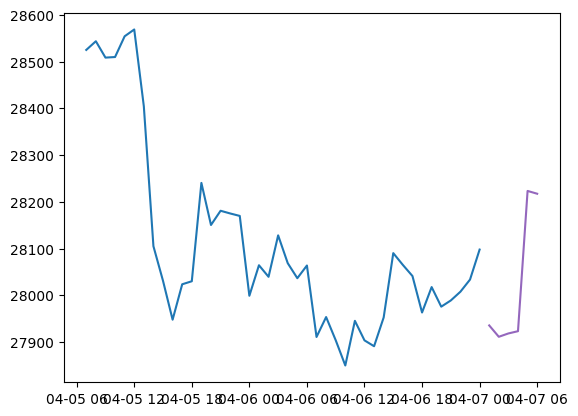

In [12]:
import numpy as np
import matplotlib.pyplot as plt
td = pd.Timedelta(hours=6)
prediction = loaded_models["Dense"].predict(data_for_prediction)[0]

# create a new DatetimeIndex for the next 24 hours
dti_new = df_pred["close"].tail(label_width).index + td
normalized_prediction = pd.DataFrame(prediction, columns=["close"] , index=dti_new ) 

mean = df_pred["close"].rolling(30).mean().tail(label_width )
mean.index = dti_new
std = df_pred["close"].rolling(30).std().tail(label_width )
std.index =dti_new
predictions_no_ma  = normalized_prediction["close"]  *std + mean
#print( predictions_no_ma)

# create a new DataFrame with the same columns as 'df' but with NaN values for the 'open_time' column and the new DatetimeIndex
prediction__ = pd.DataFrame({'close': predictions_no_ma.values }, index=dti_new, columns=df_pred.columns)

plt.plot(df_pred["close"].tail(imput_width))
# display the plot
plt.plot( prediction__ )



In [ ]:
def predict(model):
    td = pd.Timedelta(hours=6)
    prediction = loaded_models[model].predict(data_for_prediction)[0]

    # create a new DatetimeIndex for the next 24 hours
    dti_new = df_pred["close"].tail(label_width).index + td
    normalized_prediction = pd.DataFrame(prediction, columns=["close"] , index=dti_new ) 

    mean = df_pred["close"].shift(imput_width -label_width).rolling(30).mean().tail(label_width )
    mean.index = dti_new
    std = df_pred["close"].shift(imput_width -label_width).rolling(30).std().tail(label_width )
    std.index =dti_new
    predictions_no_ma  = normalized_prediction["close"]  *std + mean
    #print( predictions_no_ma)

    # create a new DataFrame with the same columns as 'df' but with NaN values for the 'open_time' column and the new DatetimeIndex
    prediction__ = pd.DataFrame({'close': predictions_no_ma.values }, index=dti_new, columns=df_pred.columns)

    data_pred = get_binance_data('BTCUSDT','1 feb 2023', '7 Apr 2023')
    df_pred = data_parser(data_pred)
    df_pred_norm = normalize(df_pred,imput_width=imput_width)
    prediction_data = df_pred_norm.tail(imput_width)
    data_for_prediction = data_for_prediction_parser(prediction_data , input_shape=input_shape)




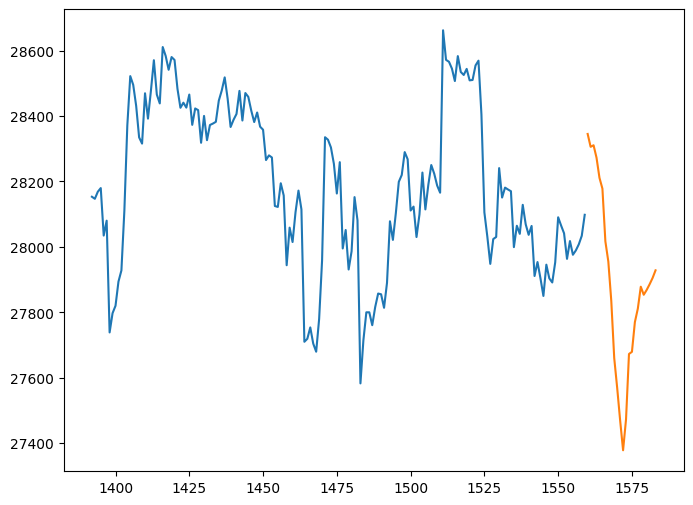

In [69]:


plt.show()

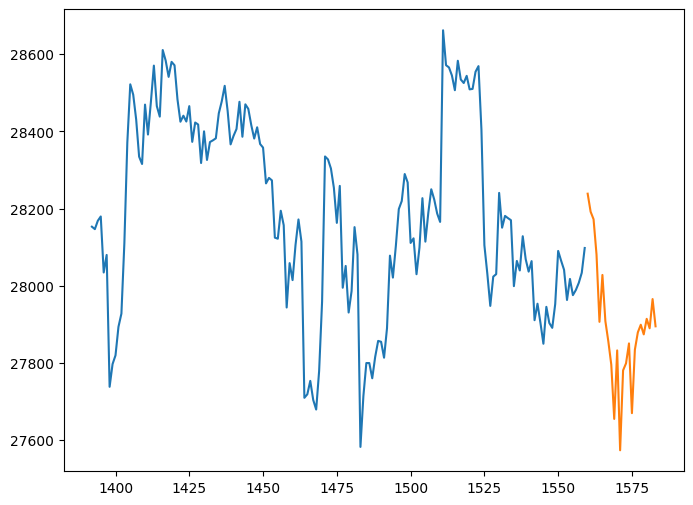

In [102]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


ModuleNotFoundError: No module named 'sklearn'

In [6]:
bitcoin_data = data
df = pd.DataFrame(data , columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'quote_asset_volume','num_trades','taker_base_vol','taker_quote_vol', 'ignore'] )
df['open_time'] = pd.to_datetime(df['open_time'])
df.set_index('open_time', inplace=True)
df = df.astype(float)
df.drop( ["ignore"] , axis=1  , inplace=True)
df.head()

,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_vol,taker_quote_vol
open_time,,,,,,,,,,
1970-01-01 00:25:27.811200,7485.01,7538.00,7477.50,7517.84,1381.859204,1.527815e+12,1.037592e+07,8465.0,859.825064,6.456825e+06
1970-01-01 00:25:27.814800,7515.03,7515.04,7478.43,7483.99,845.777769,1.527818e+12,6.341206e+06,14282.0,492.022255,3.688720e+06
1970-01-01 00:25:27.818400,7483.99,7522.54,7480.00,7487.82,954.614574,1.527822e+12,7.162305e+06,12365.0,587.432232,4.407405e+06
1970-01-01 00:25:27.822000,7487.82,7509.99,7454.35,7495.13,978.126602,1.527826e+12,7.322881e+06,11082.0,537.670795,4.025818e+06
1970-01-01 00:25:27.825600,7495.13,7497.07,7455.48,7491.22,962.828704,1.527829e+12,7.202737e+06,14969.0,538.148326,4.026065e+06


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

window_size = 24*7
predicionlenght = 24
rmse_list = []
arima_model = SARIMAX(df["close"].diff(), order=(2,1,10))
arima_fit = arima_model.fit()
predictions = arima_fit.forecast(steps=predicionlenght)
print(predictions)
# Iterate through windows of test data
""" for i in range(len(df) - window_size):
    # Split data into training and testing sets
    train_data = df["close"].iloc[i:i+window_size]
    test_data = df["close"].iloc[i+window_size:i+window_size+predicionlenght]
    print(train_data , test_data )
    # Fit ARIMA model to training data
    arima_model = ARIMA(train_data, order=(1,1,1))
    arima_fit = arima_model.fit()

    # Predict Bitcoin prices for test data
    predictions = arima_fit.forecast(steps=predicionlenght)
    print(predictions)

    # Calculate root mean squared error (RMSE)
    rmse = np.sqrt(mean_squared_error(test_data, predictions))

    # Add RMSE value to list
    rmse_list.append(rmse)

# Calculate average RMSE over all windows
avg_rmse = np.mean(rmse_list)

print("Average RMSE:", avg_rmse) """


/home/alice/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/alice/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/alice/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/alice/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


42101     4.833385
42102     2.683808
42103   -10.799863
42104    14.325154
42105    -2.154795
42106    -2.599024
42107     4.118660
42108    -4.950964
42109     6.081731
42110    -3.675887
42111     1.967215
42112     2.023430
42113    -3.618877
42114     5.860290
42115    -4.611171
42116     3.765349
42117    -0.095667
42118    -1.805616
42119     4.879351
42120    -4.736051
42121     4.940660
42122    -1.958960
42123     0.187635
42124     3.342799
Name: predicted_mean, dtype: float64


/home/alice/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


' for i in range(len(df) - window_size):\n    # Split data into training and testing sets\n    train_data = df["close"].iloc[i:i+window_size]\n    test_data = df["close"].iloc[i+window_size:i+window_size+predicionlenght]\n    print(train_data , test_data )\n    # Fit ARIMA model to training data\n    arima_model = ARIMA(train_data, order=(1,1,1))\n    arima_fit = arima_model.fit()\n\n    # Predict Bitcoin prices for test data\n    predictions = arima_fit.forecast(steps=predicionlenght)\n    print(predictions)\n\n    # Calculate root mean squared error (RMSE)\n    rmse = np.sqrt(mean_squared_error(test_data, predictions))\n\n    # Add RMSE value to list\n    rmse_list.append(rmse)\n\n# Calculate average RMSE over all windows\navg_rmse = np.mean(rmse_list)\n\nprint("Average RMSE:", avg_rmse) '

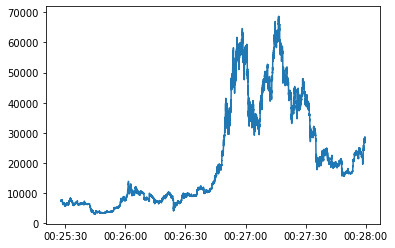

In [129]:
import matplotlib.pyplot as plt

# Plot the original time series
plt.plot(df.index, df['close'], label='Original')

# Plot the predicted values
plt.plot(predictions.index, predictions.values, label='Predicted')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Predictions')

# Show the legend and plot
plt.legend()
plt.show()

In [23]:
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                42101
Model:                ARIMA(2, 1, 10)   Log Likelihood             -285929.669
Date:                Fri, 24 Mar 2023   AIC                         571885.338
Time:                        21:34:44   BIC                         571997.759
Sample:                             0   HQIC                        571920.837
                              - 42101                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6898      0.003   -600.142      0.000      -1.695      -1.684
ar.L2         -0.9830      0.003   -347.409      0.000      -0.989      -0.977
ma.L1          0.6902      0.003    199.799      0.000       0.683       0.697
ma.L2         -0.7236      0.003   -223.210      0.000      -0.730      -0.717
ma.L3         -0.9890      0.004   -232.201      0.000      -0.997      -0.981
ma.L4         -0.0131      0.004     -3.351      0.001      -0.021      -0.005
ma.L5         -0.0078      0.004     -2.044      0.041      -0.015      -0.000
ma.L6          0.0294      0.004      7.017      0.000       0.021       0.038
ma.L7          0.0343      0.004      8.751      0.000       0.027       0.042
ma.L8         -0.0108      0.003     -3.373      0.001      -0.017      -0.005
ma.L9         -0.0097      0.003     -3.510      0.000      -0.015      -0.004
ma.L10         0.0001      0.002      0.055      0.956      -0.004       0.005
sigma2      4.689e+04     90.050    520.686      0.000    4.67e+04    4.71e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1448936.36
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              17.72   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
non_stationary_data = df[["close"] ]

In [19]:
from scipy.stats import boxcox

non_stationary_data['value_diff'] = non_stationary_data["close"].diff()
non_stationary_data['value_seasonal_diff'] = non_stationary_data['close'].diff(12)
non_stationary_data['value_log'] = np.log(non_stationary_data['close'])
non_stationary_data['value_boxcox'], fitted_lambda = boxcox(non_stationary_data['close'])



/tmp/ipykernel_8114/991760935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_stationary_data['value_diff'] = non_stationary_data["close"].diff()
/tmp/ipykernel_8114/991760935.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_stationary_data['value_seasonal_diff'] = non_stationary_data['close'].diff(12)
/tmp/ipykernel_8114/991760935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [20]:
from statsmodels.tsa.stattools import adfuller
for column in non_stationary_data.columns:
    adf_result = adfuller(non_stationary_data[column].dropna())
    print(f'ADF Statistic: {adf_result[0]} for {column}')
    print(f'p-value: {adf_result[1]}')



ADF Statistic: -1.3092747294283693 for close
p-value: 0.6249185036138085
ADF Statistic: -29.42270581200733 for value_diff
p-value: 0.0
ADF Statistic: -24.9581636610649 for value_seasonal_diff
p-value: 0.0
ADF Statistic: -0.9720612724743178 for value_log
p-value: 0.7633174550940749
ADF Statistic: -0.9668790211131959 for value_boxcox
p-value: 0.765151975502466


<Figure size 864x432 with 0 Axes>

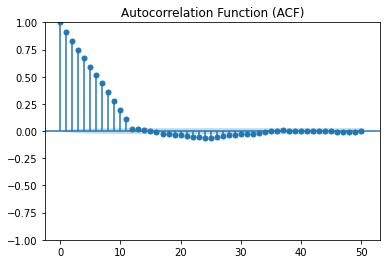

/home/alice/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x432 with 0 Axes>

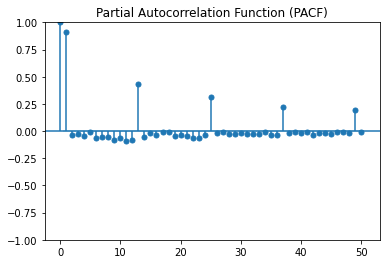

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

stationary_series = non_stationary_data['value_seasonal_diff'].dropna()
# ACF plot
plt.figure(figsize=(12, 6))
plot_acf(stationary_series, lags=50, alpha=0.05)
plt.title("Autocorrelation Function (ACF)")
plt.show()

# PACF plot
plt.figure(figsize=(12, 6))
plot_pacf(stationary_series, lags=50, alpha=0.05)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show() 
